In [1]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras.metrics import MeanIoU
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

2022-12-01 09:32:02.757501: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pi/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/cv2/../../lib64:
2022-12-01 09:32:02.757540: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
mask_path = '../Oil Tanks/image_patches_mask'


In [25]:
base_accuracy = []
for file in os.listdir(mask_path):
    break
    mask_iamge = cv2.imread(mask_path+'/'+file)
#     break
    mask_iamge = mask_iamge[:,:,0]/255
    break
    mask_iamge[mask_iamge>0.5]=1
#     break
    mask_iamge[mask_iamge<0.5]=0
    mask_iamge = mask_iamge.reshape(512*512)
    black_iamge = mask_iamge*0
    base_accuracy.append(accuracy_score(mask_iamge,black_iamge ))

In [28]:
mask_iamge[mask_iamge>0.5]

array([1.        , 0.98431373, 1.        , ..., 0.97647059, 1.        ,
       1.        ])

In [20]:
# mask_iamge = mask_iamge[:,:,0]/255
mask_iamge[mask_path>0.5]

TypeError: '>' not supported between instances of 'str' and 'float'

In [81]:
np.mean(base_accuracy)

0.9374654907417895

In [35]:
def dice_loss(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  numerator = 2 * tf.reduce_sum(y_true * y_pred)
  denominator = tf.reduce_sum(y_true + y_pred)

  return numerator / denominator

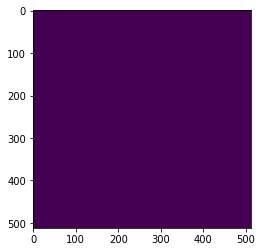

In [49]:
loss_list = []
for file in os.listdir(mask_path):
    mask_iamge = cv2.imread(mask_path+'/'+file)
    mask_iamge = mask_iamge[:,:,0]/255
    black_iamge = mask_iamge*0
    black_iamge.shape, mask_iamge.shape

    plt.imshow(black_iamge)
    loss_list.append(dice_loss(mask_iamge, black_iamge).numpy())


In [55]:
dice_loss(mask_iamge, black_iamge).numpy()

0.0

In [54]:
np.mean(loss_list)

0.0